# Clustering de Estudiantes


# Diccionario de Variables: Dataset de Tipología de Estudiantes

Este dataset contiene información simulada de estudiantes en un salón de clases, con el objetivo de identificar tipologías basadas en su tipo de inteligencia y comportamiento.

| Variable                      | Tipo       | Rango / Valores       | Descripción                                                                                   |
|-------------------------------|------------|-----------------------|-----------------------------------------------------------------------------------------------|
| **Puntaje_Lógico_Matemático** | Numérica   | 40-100               | Representa la capacidad del estudiante para razonar lógicamente y resolver problemas matemáticos. |
| **Puntaje_Verbal_Lingüístico**| Numérica   | 30-100               | Mide la habilidad para comprender y expresarse en lenguaje verbal o escrito.                 |
| **Puntaje_Visual_Espacial**   | Numérica   | 20-100               | Indica la destreza para interpretar y trabajar con imágenes, gráficos y representaciones espaciales. |
| **Puntaje_Musical**           | Numérica   | 10-100               | Evalúa la sensibilidad del estudiante hacia el ritmo, tono y melodías musicales.             |
| **Puntaje_Cinético_Corporal** | Numérica   | 20-100               | Refleja la habilidad para controlar el cuerpo y realizar actividades físicas o motoras.       |
| **Puntaje_Interpersonal**     | Numérica   | 10-100               | Mide la facilidad para comunicarse y colaborar con otras personas.                           |
| **Puntaje_Intrapersonal**     | Numérica   | 30-100               | Indica la capacidad para la introspección y la autorregulación emocional.                     |
| **Horas_Estudio_Semanal**     | Numérica   | 5-40                 | Cantidad promedio de horas que el estudiante dedica a estudiar fuera del aula cada semana.   |
| **Participación_En_Clases**   | Numérica   | 1-10                 | Calificación subjetiva o cuantitativa del nivel de participación activa del estudiante en clase. |
| **Preferencia_Grupal**        | Categórica | 0 (Individual) / 1 (Grupal) | Indica si el estudiante prefiere trabajar individualmente (0) o en equipo (1).               |



## Instrucciones
Este análisis implementa un modelo de clustering considerando la variable **"Preferencia Grupal"** y proporciona explicaciones detalladas sobre las decisiones y pasos realizados. Incluye validaciones para garantizar la calidad de los datos y los resultados. El flujo es el siguiente:

1. Importar los datos.
2. Revisar su estructura y preparar las variables necesarias.
3. Implementar un modelo de clustering (K-Means).
4. Evaluar el modelo utilizando el método del codo.
5. Visualizar los clusters y sus características.

### Prompts Generales
Para realizar un análisis similar, puedes solicitar:
- "Implementa un análisis de clustering con mis datos."
- "Incluye variables categóricas en el modelo de clustering."
- "Evalúa el número óptimo de clusters usando el método del codo."
- "Explica cada paso de un análisis de clustering."


## Paso 1: Importar los datos


### ¿Por qué importar y revisar los datos?
Antes de realizar cualquier análisis, es fundamental cargar los datos y validar su estructura. Esto asegura que las variables necesarias están presentes y en el formato correcto.


In [1]:

import pandas as pd

# Importar los datos
df = pd.read_csv('dataset_estudiantes_con_ruido.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())


# Validar valores nulos
if df.isnull().sum().sum() > 0:
    print("\nAdvertencia: Hay valores nulos en el dataset.")
else:
    print("\nNo hay valores nulos en el dataset.")


Primeras filas del dataset:
   Puntaje_Lógico_Matemático  Puntaje_Verbal_Lingüístico  \
0                  85.058701                   47.507299   
1                  86.783393                   50.833304   
2                  84.368576                   70.484884   
3                  88.737485                   49.199994   
4                  93.119042                   58.461465   

   Puntaje_Visual_Espacial  Puntaje_Musical  Puntaje_Cinético_Corporal  \
0                80.494374        13.660467                  51.042241   
1                83.254375        33.043745                  48.299763   
2                93.509802        36.048297                  72.846290   
3                81.433720        42.870022                  59.721302   
4                92.452101        47.147788                  51.853508   

   Puntaje_Interpersonal  Puntaje_Intrapersonal  Horas_Estudio_Semanal  \
0              43.022100              48.505955              32.664140   
1              56.

## Paso 2: Preparar los datos para el clustering


### ¿Por qué preparar los datos?
1. **Estandarización de variables numéricas:** Las variables numéricas deben estar en la misma escala para que las distancias calculadas sean significativas.
2. **Incluir variables categóricas:** Variables como "Preferencia Grupal" pueden agregar valor al análisis. Es importante tratarlas adecuadamente.


a. Separamos las variables numericas en un objeto y las categoricas en otro 

In [2]:

from sklearn.preprocessing import StandardScaler
import numpy as np

# Variables numéricas y categóricas
variables_numericas = [
    'Puntaje_Lógico_Matemático',
    'Puntaje_Verbal_Lingüístico',
    'Puntaje_Visual_Espacial',
    'Puntaje_Musical',
    'Puntaje_Cinético_Corporal',
    'Puntaje_Interpersonal',
    'Puntaje_Intrapersonal',
    'Horas_Estudio_Semanal',
    'Participación_En_Clases'
]

variables_categoricas = ['Preferencia_Grupal']



b. Estandarizar variables, como tienen diferente escala (rango de valores y significados) debemos hacerlas más compatibles para el análisis

In [3]:
# Estandarizar las variables numéricas. Usa normalización Z score media 0 DS 1, deja los datos casi siempre en un rango entre -3 y 3
scaler = StandardScaler()
X_numerical = scaler.fit_transform(df[variables_numericas]) # Esto también extrae los datos como un array y no como un DF, ya que k means funciona con datos así

c. obtener valores en array de las variables categoricas

In [4]:
# Obtener las variables categóricas #Acá se hace lo mismo, se toman los valores como array 
X_categorical = df[variables_categoricas].values

d. unir ambos conjuntos de variables



In [5]:
# Concatenar variables numéricas y categóricas
X = np.hstack((X_numerical, X_categorical))

In [6]:
X

array([[ 0.79462499, -1.45361687,  0.60119417, ...,  1.1087114 ,
        -0.85934295,  0.        ],
       [ 0.87591721, -1.22312661,  0.72925616, ...,  0.25615442,
        -0.73725621,  0.        ],
       [ 0.76209638,  0.1387167 ,  1.20510035, ..., -0.74133043,
        -1.4958541 ,  0.        ],
       ...,
       [-0.18803086,  0.09917463,  0.00997866, ...,  0.34791641,
         0.88713963,  0.        ],
       [ 0.48495507,  0.60684028, -0.29480346, ...,  0.13928727,
         1.55167924,  0.        ],
       [ 0.18418302, -0.30826548,  0.20513311, ...,  0.23782578,
        -0.32681635,  0.        ]])

## Paso 3: Determinar el número óptimo de clusters (Método del codo)


### ¿Por qué usar el método del codo?
El método del codo ayuda a identificar el número óptimo de clusters al observar la disminución de la inercia. La "curva del codo" marca el punto donde la reducción en inercia comienza a estabilizarse.


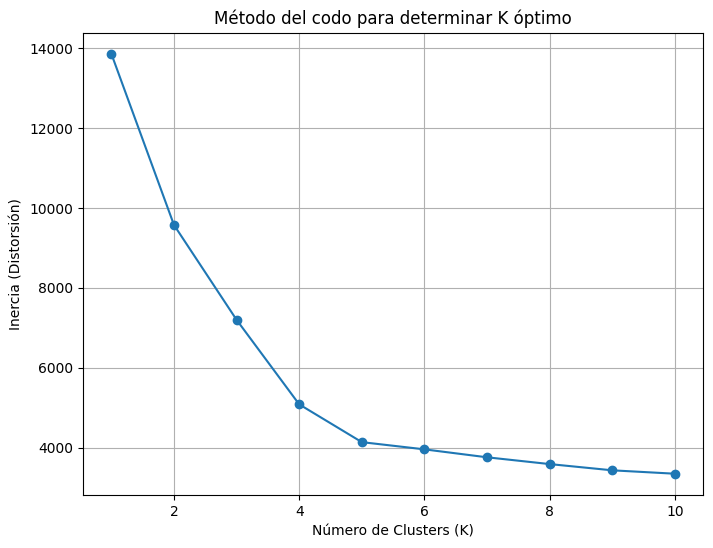

In [7]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Evaluar diferentes valores de K, inercia es una medida conceptualmente parecida a la varianza, 
# buscamos el mejor equilibrio entre numero de centroides y menores valores de inercia
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia (Distorsión)')
plt.title('Método del codo para determinar K óptimo')
plt.grid()
plt.show()


## Paso 4: Aplicar el modelo K-Means


### ¿Por qué aplicar K-Means?
K-Means es un algoritmo eficaz para dividir los datos en grupos basados en similitudes. Aquí se utiliza el número óptimo de clusters identificado previamente.


In [8]:

# Definir K óptimo (según el método del codo)
k_optimo = 5

# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)

#obtener a qué observación pertenecen los valores de X 
clusters = kmeans.fit_predict(X)

# Añadir los clusters al DataFrame
df['Cluster'] = clusters

#Visualizar los clusters añadidos a cada observación
df


,Puntaje_Lógico_Matemático,Puntaje_Verbal_Lingüístico,Puntaje_Visual_Espacial,Puntaje_Musical,Puntaje_Cinético_Corporal,Puntaje_Interpersonal,Puntaje_Intrapersonal,Horas_Estudio_Semanal,Participación_En_Clases,Preferencia_Grupal,Tipología,Cluster
0,85.058701,47.507299,80.494374,13.660467,51.042241,43.022100,48.505955,32.664140,3.765444,0,Matematicos_Razonadores,1
1,86.783393,50.833304,83.254375,33.043745,48.299763,56.690641,41.866973,26.734569,4.081142,0,Matematicos_Razonadores,1
2,84.368576,70.484884,93.509802,36.048297,72.846290,46.724423,39.480433,19.797019,2.119517,0,Matematicos_Razonadores,1
3,88.737485,49.199994,81.433720,42.870022,59.721302,56.769402,43.618307,34.008405,2.667153,0,Matematicos_Razonadores,1
4,93.119042,58.461465,92.452101,47.147788,51.853508,43.534831,41.073023,35.298165,4.386658,0,Matematicos_Razonadores,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,70.812157,70.055444,57.836782,74.717902,80.445956,72.192696,64.482788,26.367000,3.696716,1,Generalistas,2
1496,74.282162,77.165253,89.094752,74.173327,69.949860,60.424089,66.200930,28.977306,7.725087,0,Generalistas,2
1497,64.210716,69.914287,67.752456,57.823633,80.668456,65.050593,77.063891,27.372778,8.281596,0,Generalistas,2
1498,78.488757,77.239970,61.183771,64.596281,65.427009,73.548605,59.376159,25.921753,10.000000,0,Generalistas,2


In [9]:
#Exportar el df con la columna que indica a qué cluster pertenece
df.to_csv('dataset_estudiantes_con_clusters.csv', index=False)

## Paso 5: Visualizar los resultados


### ¿Por qué visualizar los clusters?
La visualización ayuda a interpretar los grupos formados y validar si los clusters están bien definidos. Reducimos la dimensionalidad a dos componentes principales para facilitar la visualización.


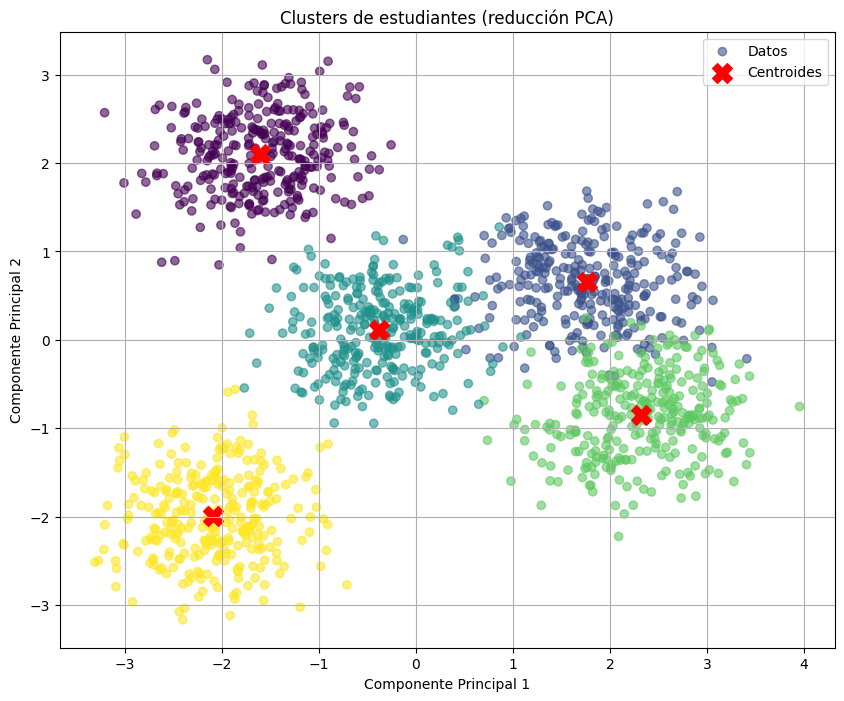

In [10]:
from sklearn.decomposition import PCA

# Reducir dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Obtener los centroides del modelo K-Means
centroides = kmeans.cluster_centers_

# Proyectar los centroides al espacio PCA
centroides_pca = pca.transform(centroides)

# Visualizar los clusters y los centroides
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters, cmap='viridis', alpha=0.6, label='Datos'
)
plt.scatter(
    centroides_pca[:, 0], centroides_pca[:, 1],
    c='red', marker='X', s=200, label='Centroides'
)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de estudiantes (reducción PCA)')
plt.legend()
plt.grid(True)
plt.show()


## Paso 6: Análisis de los centroides


### ¿Por qué analizar los centroides?
Los centroides representan las características promedio de cada cluster, lo que permite interpretarlos y entender sus diferencias.


In [11]:

# Desescalar los centroides numéricos
centroides = kmeans.cluster_centers_
centroides_numericos = centroides[:, :len(variables_numericas)]
centroides_categoricos = centroides[:, len(variables_numericas):]

centroides_numericos_desescalados = scaler.inverse_transform(centroides_numericos)
centroides_df = pd.DataFrame(centroides_numericos_desescalados, columns=variables_numericas)

# Convertir los centroides categóricos a DataFrame
centroides_categoricos_df = pd.DataFrame(centroides_categoricos, columns=variables_categoricas)

# Combinar los centroides numéricos y categóricos
centroides_completos = pd.concat([centroides_df, centroides_categoricos_df], axis=1)

print("Centroides de los clusters:")
print(centroides_completos)

# Interpretar los centroides
for i, row in centroides_completos.iterrows():
    print(f"\nCaracterísticas del Cluster {i}:")
    for variable in centroides_completos.columns:
        if variable in variables_categoricas:
            print(f"  {variable}: {row[variable]:.2f}")
        else:
            print(f"  {variable}: {row[variable]:.2f}")

Centroides de los clusters:
   Puntaje_Lógico_Matemático  Puntaje_Verbal_Lingüístico  \
0                  44.868439                   60.169745   
1                  92.215137                   59.717121   
2                  70.537865                   69.799231   
3                  88.115885                   60.242719   
4                  45.334787                   92.453496   

   Puntaje_Visual_Espacial  Puntaje_Musical  Puntaje_Cinético_Corporal  \
0                89.785829        94.287180                  87.023979   
1                87.028269        28.738783                  60.036969   
2                70.371745        69.874026                  69.056239   
3                50.312509        50.236392                  50.374577   
4                40.244148        59.624352                  59.961327   

   Puntaje_Interpersonal  Puntaje_Intrapersonal  Horas_Estudio_Semanal  \
0              59.973881              59.129422              20.148736   
1              59.

## Paso 1: Análisis de los Centroides de los Clusters con Clasificaciones

A continuación, se presenta una tabla con los centroides de cada cluster y, al lado de cada valor, su clasificación relativa (Bajo, Medio, Alto) en comparación con los demás clusters.

### **Centroides de los Clusters con Clasificaciones**

| **Variable**                 | **Cluster 0**           | **Cluster 1**             | **Cluster 2**           | **Cluster 3**           | **Cluster 4**           |
|-------------------------------|-------------------------|---------------------------|-------------------------|-------------------------|-------------------------|
| **Puntaje Lógico-Matemático** | 45.33 (Bajo)           | 70.54 (Medio-Alto)        | 92.22 (Muy Alto)        | 88.12 (Alto)           | 44.87 (Bajo)           |
| **Puntaje Verbal-Lingüístico**| 92.45 (Muy Alto)       | 69.80 (Medio-Alto)        | 59.72 (Medio)           | 60.24 (Medio)          | 60.17 (Medio)          |
| **Puntaje Visual-Espacial**   | 40.24 (Bajo)           | 70.37 (Medio-Alto)        | 87.03 (Alto)           | 50.31 (Medio)          | 89.79 (Muy Alto)       |
| **Puntaje Musical**           | 59.62 (Medio)          | 69.87 (Alto)              | 28.74 (Bajo)           | 50.24 (Medio)          | 94.29 (Muy Alto)       |
| **Puntaje Cinético-Corporal** | 59.96 (Medio)          | 69.06 (Alto)              | 60.04 (Medio)          | 50.37 (Medio)          | 87.02 (Muy Alto)       |
| **Puntaje Interpersonal**     | 88.88 (Muy Alto)       | 69.86 (Alto)              | 59.68 (Medio)          | 30.52 (Bajo)           | 59.97 (Medio)          |
| **Puntaje Intrapersonal**     | 59.24 (Medio)          | 70.01 (Alto)              | 39.00 (Bajo)           | 92.57 (Muy Alto)       | 59.13 (Medio)          |
| **Horas Estudio Semanal**     | 20.26 (Bajo)           | 24.84 (Medio)             | 30.09 (Alto)           | 29.44 (Alto)           | 20.15 (Bajo)           |
| **Participación en Clases**   | 7.77 (Alto)            | 6.45 (Medio)              | 4.70 (Bajo)            | 4.69 (Bajo)            | 6.33 (Medio)           |

---

## Paso 2: Construcción de las Tipologías Basadas en los Clusters

### **Cluster 0**

#### **Tipología Construida**:
**"Comunicadores Sociales Extrovertidos"**

#### **Descripción**:
Individuos con excelentes habilidades verbales y sociales, que sobresalen en comunicación y trabajo en equipo. Son participativos en clase y disfrutan de interacciones sociales. Su enfoque está en áreas relacionadas con las humanidades, artes y ciencias sociales. Tienen menor interés o habilidad en áreas lógico-matemáticas y visuales-espaciales.

---

### **Cluster 1**

#### **Tipología Construida**:
**"Generalistas Multifacéticos"**

#### **Descripción**:
Personas con habilidades equilibradas en múltiples áreas, mostrando competencia tanto en disciplinas académicas como artísticas. Son versátiles y pueden adaptarse a diferentes campos, destacando en entornos que requieren habilidades diversas. Su participación y dedicación al estudio es moderada.

---

### **Cluster 2**

#### **Tipología Construida**:
**"Matemáticos y Analistas Visuales"**

#### **Descripción**:
Individuos con excepcional capacidad en razonamiento lógico-matemático y habilidades visuales-espaciales. Tienden a ser más introvertidos y prefieren el estudio individual. Destacan en áreas como matemáticas, física, ingeniería y arquitectura. Su participación en clase es limitada, enfocándose más en tareas y proyectos individuales.

---

### **Cluster 3**

#### **Tipología Construida**:
**"Estrategas Solitarios Reflexivos"**

#### **Descripción**:
Personas con alta capacidad analítica y profunda autoconciencia. Prefieren trabajar de manera independiente y tienen poca inclinación hacia interacciones sociales. Son metódicos y estratégicos, dedicando mucho tiempo al estudio y reflexión. Pueden sobresalir en áreas como investigación, ciencias de la computación y planificación estratégica.

---

### **Cluster 4**


#### **Tipología Construida**:
**"Artistas Creativos y Expresivos"**

#### **Descripción**:
Individuos con talentos excepcionales en artes visuales, música y expresión corporal. Tienen una fuerte inclinación hacia actividades creativas y artísticas. Su habilidad lógico-matemática es menor, y prefieren aprender a través de experiencias prácticas y expresivas. Pueden destacar en campos como artes plásticas, música, danza y diseño.

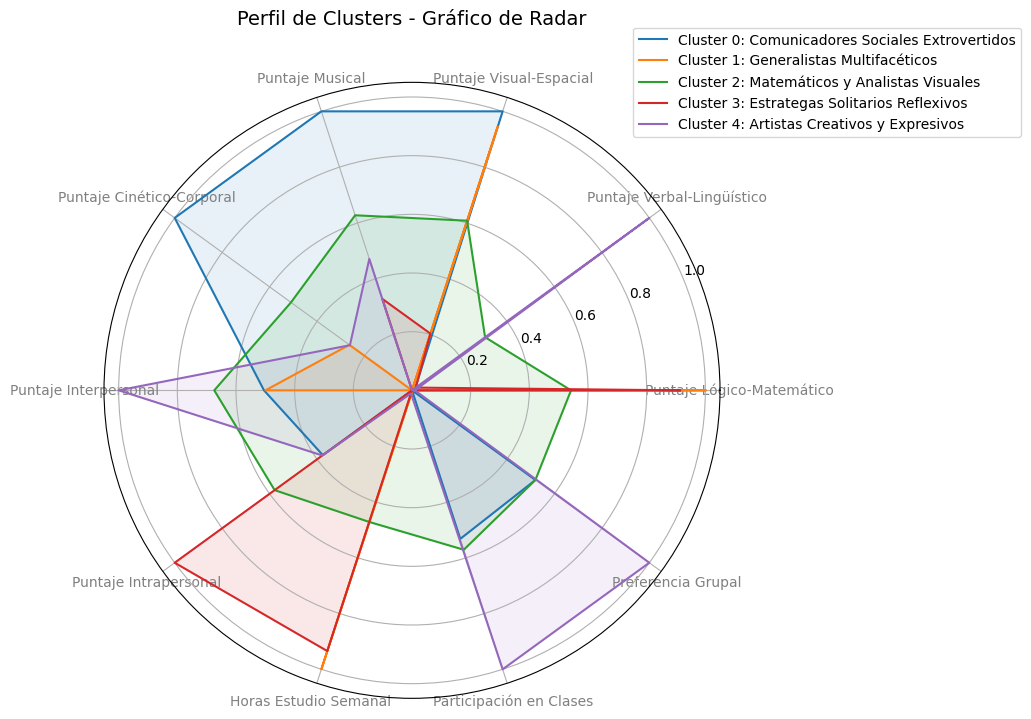

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Datos actualizados de los centroides
variables = [
    'Puntaje Lógico-Matemático', 'Puntaje Verbal-Lingüístico',
    'Puntaje Visual-Espacial', 'Puntaje Musical', 'Puntaje Cinético-Corporal',
    'Puntaje Interpersonal', 'Puntaje Intrapersonal', 'Horas Estudio Semanal',
    'Participación en Clases', 'Preferencia Grupal'
]

clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Datos extraídos de los centroides
datos = [
    [44.87, 60.17, 89.79, 94.29, 87.02, 59.97, 59.13, 20.15, 6.33, 0.52],  # Cluster 0
    [92.22, 59.72, 87.03, 28.74, 60.04, 59.68, 39.00, 30.09, 4.70, 0.00],  # Cluster 1
    [70.54, 69.80, 70.37, 69.87, 69.06, 69.86, 70.01, 24.84, 6.45, 0.52],  # Cluster 2
    [88.12, 60.24, 50.31, 50.24, 50.37, 30.52, 92.57, 29.44, 4.69, 0.00],  # Cluster 3
    [45.33, 92.45, 40.24, 59.62, 59.96, 88.88, 59.24, 20.26, 7.77, 1.00],  # Cluster 4
]

# Crear el DataFrame con los datos actualizados
df = pd.DataFrame(datos, columns=variables, index=clusters)

# Lista de tipologías correspondientes a cada cluster
tipologias = [
    'Comunicadores Sociales Extrovertidos',   # Cluster 0
    'Generalistas Multifacéticos',            # Cluster 1
    'Matemáticos y Analistas Visuales',       # Cluster 2
    'Estrategas Solitarios Reflexivos',       # Cluster 3
    'Artistas Creativos y Expresivos'         # Cluster 4
]

### Paso 1: Normalizar los datos
# **¿Por qué normalizar los datos?**
# Las variables están en diferentes escalas (por ejemplo, "Horas Estudio Semanal" frente a "Puntaje Musical").
# La normalización las lleva al mismo rango (0 a 1) para una comparación justa en el gráfico.
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=variables, index=clusters)

# Añadir la primera fila al final para cerrar el gráfico de radar
df_normalizado = pd.concat([df_normalizado, df_normalizado.iloc[[0]]], ignore_index=True)

### Paso 2: Configurar los ángulos para el gráfico de radar
# **¿Por qué usar ángulos?**
# Cada variable se coloca en un ángulo del círculo. Necesitamos calcular los ángulos para distribuir las variables uniformemente.
categorias = list(df_normalizado.columns)
N = len(categorias)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]  # Cerrar el círculo

### Paso 3: Crear el gráfico de radar
# **¿Por qué un gráfico de radar?**
# Es útil para visualizar múltiples dimensiones simultáneamente y comparar los perfiles de los clusters.
plt.figure(figsize=(10, 8))

for i in range(len(df_normalizado)-1):
    valores = df_normalizado.iloc[i].values.flatten().tolist()
    valores += valores[:1]
    etiqueta = f'Cluster {i}: {tipologias[i]}'
    plt.polar(angulos, valores, label=etiqueta)
    plt.fill(angulos, valores, alpha=0.1)

### Paso 4: Configuración final del gráfico
# **¿Por qué añadir títulos y leyendas?**
# Esto facilita la interpretación de los resultados al identificar los clusters y sus características.
plt.xticks(angulos[:-1], categorias, color='grey', size=10)
plt.title('Perfil de Clusters - Gráfico de Radar', size=14, y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))
plt.show()
